In [1]:
from nets.Siamese import Siamese
import utils.utils as utils

import torch
import torchvision.transforms as transforms
import torch.nn.functional as F
from PIL import Image

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('The device you are using is: ', device)

The device you are using is:  cuda:0


In [3]:
model = Siamese()

state_dict_path = 'logs/No_kuang_model_state_dict.pth'
model.load_state_dict(torch.load(state_dict_path))

model.to(device)
model.eval()

Siamese(
  (vgg): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1,

In [4]:
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [5]:
img_path_1 = 'images/蔡洲_real_1.jpg'
img_path_2 = 'images/蔡洲_forg_1.jpg'

img1 = Image.open(img_path_1).convert('L')
img2 = Image.open(img_path_2).convert('L')

# Apply the transformations
img1 = test_transform(img1)
img2 = test_transform(img2)

# Add a batch dimension (model expects batches)
img1 = img1.unsqueeze(0)
img2 = img2.unsqueeze(0)

In [6]:
img1, img2 = img1.to(device), img2.to(device)
model = model.to(device)
model.eval()

with torch.no_grad():
    output = model(img1, img2)

prob = F.sigmoid(output).item()
print(f'Probability that the signatures are fraud: {prob:.2f}')

Probability that the signatures are fraud: 1.00


Probability that the signatures are fraud: 1.00


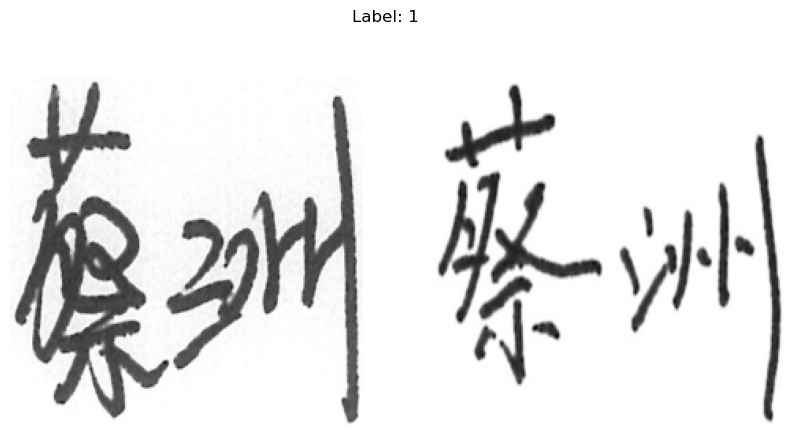

In [7]:
img_demo_1, img_demo_2, label_demo = img1[0].cpu().numpy(), img2[0].cpu().numpy(), int(prob > 0.1)
print(f'Probability that the signatures are fraud: {prob:.2f}')

utils.visualize_images(img_demo_1, img_demo_2, label_demo)